In [1]:
import numpy as np

In [67]:
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float
)

In [3]:
X = np.matrix([
    [i, -i]
    for i in range(A.shape[0])
], dtype=float)
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [4]:
A * X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

In [5]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [6]:
A_hat = A + I
A_hat * X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

In [7]:
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
D

matrix([[1., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 1.]])

In [8]:
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float
)
D**-1 * A

matrix([[0. , 1. , 0. , 0. ],
        [0. , 0. , 0.5, 0.5],
        [0. , 0.5, 0. , 0. ],
        [1. , 0. , 1. , 0. ]])

In [9]:
D**-1 * A * X

matrix([[ 1. , -1. ],
        [ 2.5, -2.5],
        [ 0.5, -0.5],
        [ 2. , -2. ]])

In [10]:
D_hat = D + I
W = np.matrix([
    [1, -1],
    [-1, 1]
])
D_hat**-1 * A_hat * X * W

matrix([[ 1., -1.],
        [ 4., -4.],
        [ 2., -2.],
        [ 5., -5.]])

In [11]:
W = np.matrix([
    [1],
    [-1]
])
D_hat**-1 * A_hat * X * W

matrix([[1.],
        [4.],
        [2.],
        [5.]])

In [12]:
def relu(x):                 # 输入一个数，如果小于等于0，则输出0，如果大于0，则返回该数
    return np.maximum(0,x)

In [13]:

W = np.matrix([
    [1, -1],
    [-1, 1]
])
relu(D_hat**-1 * A_hat * X * W)

matrix([[1., 0.],
        [4., 0.],
        [2., 0.],
        [5., 0.]])

In [28]:
from networkx import to_numpy_matrix
import networkx as nx
zkc = nx.karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [29]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))

In [30]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [31]:
feature_representations = {
    node: np.array(output)[node]
    for node in zkc.nodes()}

In [63]:
feature_representations

{0: array([0.24518378, 0.44108905]),
 1: array([0.24693636, 0.37437053]),
 2: array([0.32449755, 0.35646764]),
 3: array([0.26247764, 0.56115264]),
 4: array([0.19852426, 0.28483922]),
 5: array([0.27434466, 0.13678123]),
 6: array([0.30029567, 0.13538739]),
 7: array([0.19265297, 0.28880533]),
 8: array([0.21038967, 0.04351546]),
 9: array([0.33363291, 0.40242631]),
 10: array([0.28356997, 0.39905693]),
 11: array([0.06709306, 0.02718494]),
 12: array([0.26276911, 0.78146424]),
 13: array([0.20642791, 0.33215842]),
 14: array([0.30020963, 0.        ]),
 15: array([0.30945496, 0.09491609]),
 16: array([0.34201573, 0.00845593]),
 17: array([0.23064432, 0.40362734]),
 18: array([0.21583448, 0.21311864]),
 19: array([0.14939038, 0.24555279]),
 20: array([0.26274983, 0.        ]),
 21: array([0.08567424, 0.17331591]),
 22: array([0.21403292, 0.        ]),
 23: array([0.45529241, 0.        ]),
 24: array([0.73727522, 0.07614325]),
 25: array([0.75285419, 0.06714391]),
 26: array([0.30094598

In [26]:
import matplotlib.pyplot as plt

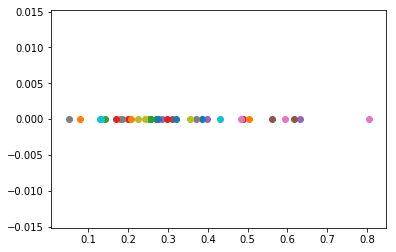

In [33]:
for i in range(0,34):
    x = feature_representations[i][0]
    y = feature_representations[i][1]
    plt.scatter(x, y)
plt.show()

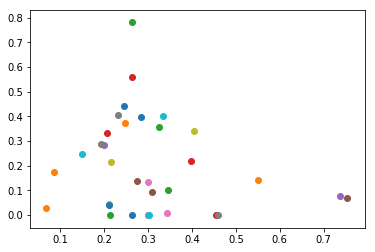

In [62]:
zkc = nx.karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

feature_representations = {node: np.array(output)[node]for node in zkc.nodes()}

for i in range(0,34):
    x = feature_representations[i][0]
    y = feature_representations[i][1]
    plt.scatter(x, y)
plt.show()